# Customer Churn Prediction for SyriaTel Telecom

- Student name: Tracy Gwehona
- Student pace: Full Time
- Instructor name: Maryann Mwikali

## Business Understanding
### Overview
Customer churn (or the loss of customers) is one of the biggest challenges for telecommunications companies such as SyriaTel because acquiring new customers can be much more expensive than keeping them. High churn rates affect profitability, market share, and long-term expansion. I aim to use  historical customer information to anticipate who is destined to exit. If the company knows the churn pattern, it will be able to apply proactive measures to increase retention and customer satisfaction and keep up with the competition.

### Business problem
SyriaTel is having customer churn which is directly impacting revenue and profit.  SyriaTel can’t develop retention plans without understanding churn and high-risk customers, leading to continued customer loss and a decline in market share. There is a need to predict customers likely to leave.


To address this, I aim to:
1. Predict customer churn.
2. Identify key factors influencing customer churn.
3. Provide actionable insights to enable SyriaTel to implement targeted interventions.

## Data Understanding
The dataset being used for this project was obtained from [kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download). Here, I am going to review the dataset to assess the structure and characteristics of the data.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [2]:
# Loading the data

df = pd.read_csv('SyriaTelCustomerChurn.csv')

#### 1) .head()
Displays the first five rows of the data.

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 2) .shape
Here, we are able to get the number of rows and columns of the whole data.

In [4]:
df.shape

(3333, 21)

- The data has 3,333 rows and 21 columns.

#### 3) .info()
Gets general information on tha data and each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- 4 columns are of object datatype.
- 8 columns are of datatype integer.
- There are 8 columns with float datatype.
- There is 1 column, 'churn' column, with a boolean datatype.

#### 4) .describe()
Here, we get the summary statistics of the columns that contain numerical data.

In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


- As shown in the output above, here we get the count of non-null values, mean, standard deviation, lower and upper quartile, minimum and maximum values of each column in the data.

## Data Preparation
### Data Cleaning
Data cleaning will involve dropping irrelevant columns, checking for duplicates and missing values and if duplicates or missing values are pesent in the data, action will be taken and also converting datatypes wherever necessary.

In [7]:
# Drop irrelevant columns

df.drop(columns=['state', 'area code', 'phone number'], axis=1, inplace=True)

In [8]:
# Check for duplicates

df.duplicated().sum()

0

There are no duplicated rows in the data.

In [9]:
# Check for missing values

df.isna().sum()

account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in the data.

In [10]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['international plan'] = label_encoder.fit_transform(df['international plan']) 
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan']) 

# Convert boolean to integer
df['churn'] = df['churn'].astype(int)

### Exploratory Data Analysis
#### Univariate Analysis
We'll explore key variables such as churn, etc to understand their distributions and identify any patterns.

#### 1. Distribution of categorical data

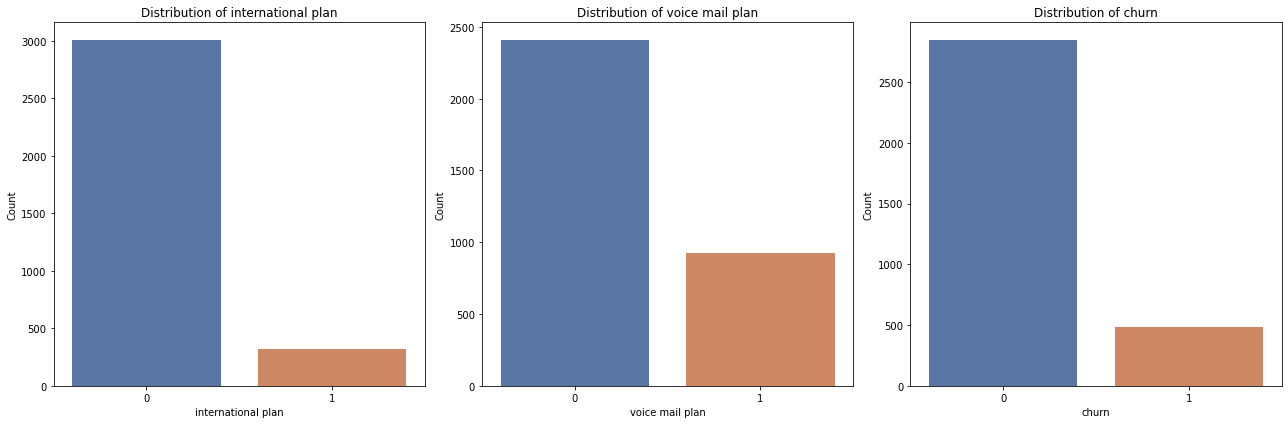

In [11]:
# List of columns with categorical data
columns = ['international plan', 'voice mail plan', 'churn']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through the columns and create count plots
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, palette='deep', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

- Majority of the customers have no international plan and voicemail plan.
- The number of customers who churn (stop using SyriaTel) are less.

#### 2. Distribution of numerical data

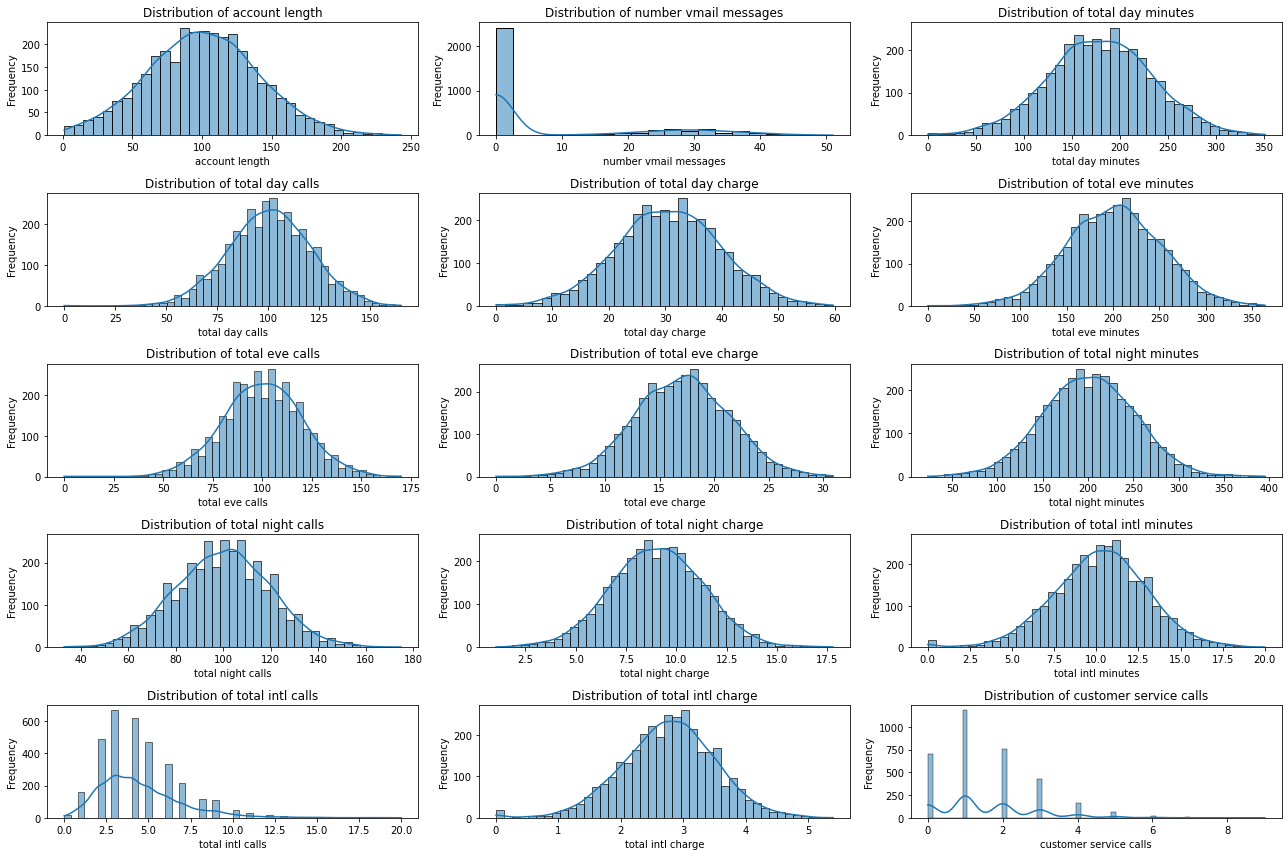

In [12]:
# List of columns with numerical data
columns = df.drop(columns=['voice mail plan', 'international plan', 'churn'], axis=1).columns

fig, axes = plt.subplots(5, 3, figsize=(18, 12))

# Flatten axes array 
axes = axes.flatten()

# Loop through the columns and create histogram plots
for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')  

plt.tight_layout()
plt.show()

- **Distribution of account length** appears approximately normal, suggesting that the data is symmetrically distributed around the mean. Majority of the customers have an average account life span.
- **Distribution of number voicemail messages** is highly right-skewed with a large number of customers having 0 voicemail messages. Most customers don't use the voicemail service. A few have a higher number of messages, but they are rare.
- **Distribution of total minutes** appear to follow a roughly normal distribution, centered around the mean. Majority of customers use a moderate number of total minutes, with fewer using extremely low or high total minutes.
- **Distribution of total calls** is also normal, suggesting a balanced call usage pattern. Most customers make an average number of calls, with fewer customers making an extremely low or high number of calls.
- **Distribution of total charge** mirrors the distribution of total minutes, as charges are directly proportional to the minutes used. The spread indicates that customers have varied levels of charges, but most fall within the central range.
- **Distribution of customer service calls** is right-skewed, with most customers making 0 to 1 customer service calls. There are a few spikes at higher values. Most customers rarely contact customer service. However, customers who call frequently (especially with 4 or more calls) might indicate dissatisfaction, which could correlate with churn.

#### Multivariate Analysis
Here, we’ll examine the relationships between the target variable (churn) and other features and also multiple features against other multiple features.

##### 3. Distribution of international and voicemail plans by churn

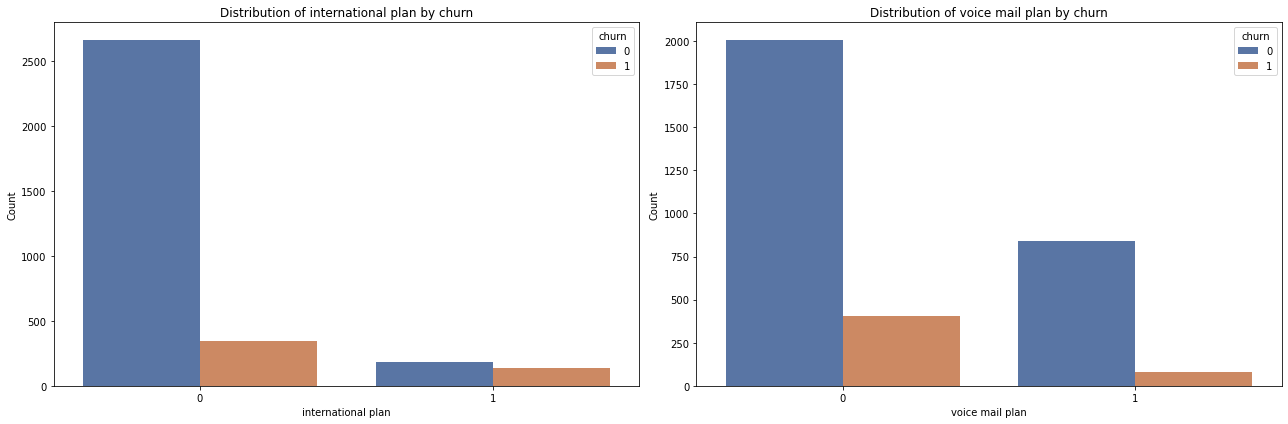

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop to create count plots
for i, col in enumerate(['international plan', 'voice mail plan']):
    sns.countplot(data=df, x=col, hue='churn', palette='deep', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


1. **International plan by churn**
- Majority of customers do not have an international plan, and among these, churn is relatively low. 
- A higher proportion of customers with an international plan have churned. This suggests that having an international plan may be associated with an increased likelihood of churn.
2. **Voice mail plan by churn**
- The majority of customers do not have a voice mail plan, and most of them did not churn. However, the number of customers who churned is significant among those without the plan.
- Fewer customers have a voice mail plan, and among them, the churn rate is relatively low compared to those without the plan. This indicates that customers with a voice mail plan are less likely to churn.

##### 4. Relationship between churn and columns with numerical data

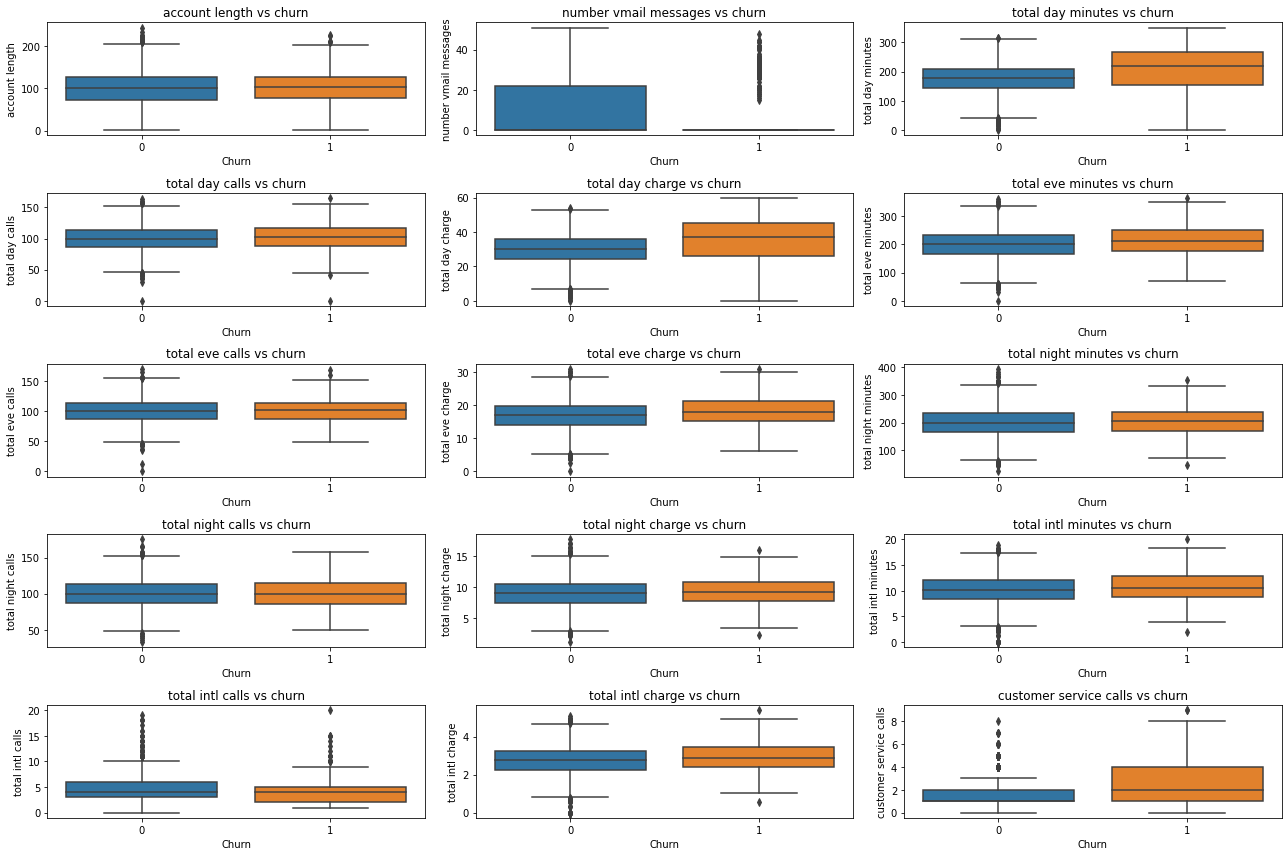

In [14]:
fig, axes = plt.subplots(5, 3, figsize=(18, 12))

# Flatten axes array 
axes = axes.flatten()

# Loop through the columns and create box plots
for i, col in enumerate(columns):
    sns.boxplot(data=df, x='churn', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(f'{col}') 

plt.tight_layout()
plt.show()

1. **Account length vs churn**
- Both churned and non-churned customers show similar distributions for account length, with no major differences.
- Account length might not be a significant factor in predicting churn.
2. **Number of Voicemail Messages vs churn**
- The majority of customers have a low number of voicemail messages.
- There are many outliers at the upper end, suggesting some customers have significantly higher voicemail messages than the rest.
3. **Total Minutes vs churn**
- Non-churn customers: Total minutes appear to be centered around a slightly lower range.
- Churned customers: These customers have a wider range of total minutes, with a higher median.
- Customers with higher total usage might be more likely to churn, potentially due to high costs.
4. **Total Calls vs churn**
- Both churned and non-churned customers show similar distributions for total calls, with no major differences.
- Total calls might not be a significant factor in predicting churn.
5. **Total Charge vs churn**
- Non-churn customers: Charges are lower and have a narrower spread.
- Churned customers: Charges are higher and exhibit a wider spread.
- Higher total charges are associated with churn, suggesting dissatisfaction with billing or costs.
6. **Customer Service Calls vs churn**
- Non-churn customers: Fewer customer service calls, with most data concentrated at the lower range.
- Churned customers: More customer service calls, with some extreme outliers.
- High interaction with customer service is associated with churn, possibly indicating unresolved issues or dissatisfaction.


##### 5. Correlation Analysis

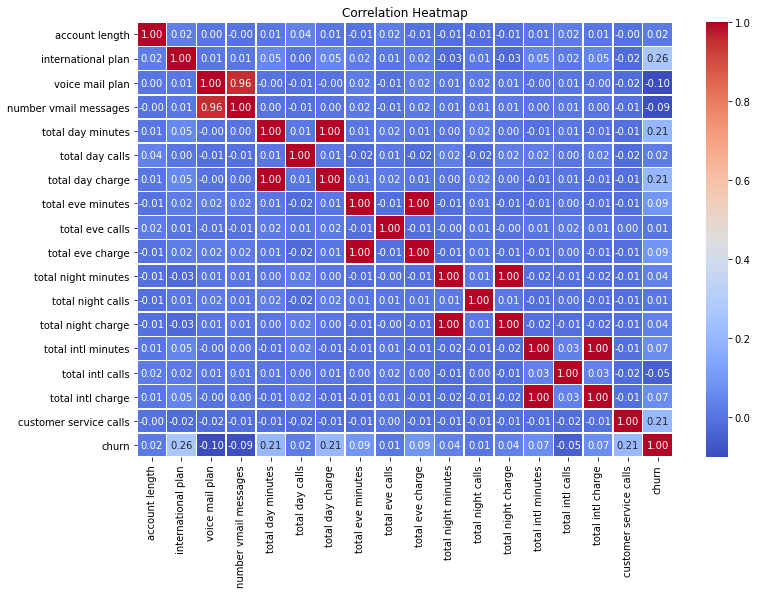

In [15]:
# Plot heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()


- Strongly correlated variables (e.g., total day minutes and total day charge) might provide redundant information.
- Variables showing significant differences in correlations (positive or negative) with the target (churn) might be more predictive.
- Features with minimal correlation (close to 0) might have limited relevance to predictive modeling unless their relationship with the target (churn) is non-linear.

Columns that are perfectly correlated provide redundant information, it's generally best to drop one of them to avoid multicollinearity and improve the model.

In [16]:
# Calculate absolute values of correlations
corr_matrix = df.corr().abs()

# Create an upper triangle matrix to avoid checking the same correlation twice
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns that have correlation higher than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop the columns from the dataframe
df.drop(to_drop, axis=1, inplace=True)

### Train Test Split

In [17]:
# Define features and the target variable
X = df.drop(columns='churn')
y = df['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### SMOTE for Class Imbalance

There is a clear class imbalance of the target variable 'churn' with a large number of non-churned customers (0) and far fewer churned customers (1) as shown in graph 1 plot 3. This imbalance could affect model performance, especially for algorithms like Logistic Regression, which are sensitive to class imbalance.

I am going to apply SMOTE to the training dataset. SMOTE will generate synthetic samples to balance the dataset, making the minority class more represented and helping the Logistic Regression model make better predictions for churn.

In [18]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Standardization
To ensure that each feature contributes equally to the model.

In [19]:
# Initialize StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_resampled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## Modelling and Evaluation
I will be implementing two models here:
1. **Logistic regression model**. Since it is well-suited for binary classification problems like the one we are facing of predicting churn or no churn.
2. **Random forest classifier**.

These models' performance will then be evaluated by use of classification metrics such as roc-auc score, precision, recall and F1 score.

### 1. Logistic Regression Model

In [20]:
# Initialize logistic regression
lr = LogisticRegression(random_state=42)

# Train the model on the resampled dataset
lr.fit(X_train_scaled_resampled, y_train_resampled)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

**Model Evaluation**

In [21]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"Logistic Regression ROC-AUC Score: {roc_auc_lr:.4f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       709
           1       0.31      0.73      0.44       125

    accuracy                           0.72       834
   macro avg       0.62      0.72      0.62       834
weighted avg       0.84      0.72      0.76       834

Logistic Regression ROC-AUC Score: 0.8052


**ROC Curve**

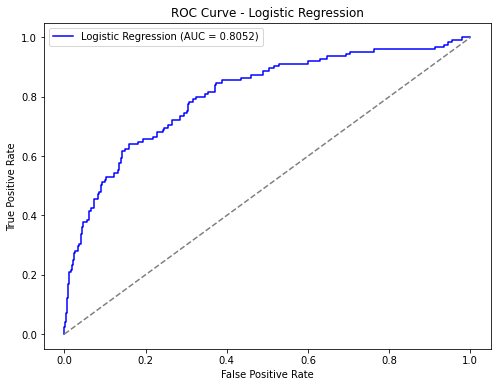

In [22]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.4f})", color="blue")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")

plt.legend()
plt.show()

**Interpretation:**
- **Precision**: Out of all the predicted non-churn cases, 94% were actually non-churn. Out of all the predicted churn cases, only 31% were actually churn. This shows that the model is not good at predicting churn cases correctly (high false positives).
- **Recall**: Out of all the actual non-churn cases, 72% were correctly predicted as non-churn. Out of all the actual churn cases, 73% were correctly predicted as churn. This indicates that the model is relatively good at detecting churn, but it tends to misclassify many non-churn cases as churn.
- **F1 score**: f1-score = 0.81 is a balance between precision and recall for the non-churn class. A good value, indicating a relatively balanced performance for class 0. F1-Score = 0.44 is a lower score for the churn class, indicating that while recall is high, precision suffers significantly. The model might be over-predicting churn (false positives).
- **Accuracy = 0.72**: The model correctly predicted 72% of the cases overall. However, accuracy is not the best metric to assess performance in imbalanced datasets, since it can be misleading.
- **ROC-AUC score = 0.8052** measures the model's ability to distinguish between churn and non-churn customers. The value is good and indicates that the model has a solid ability to distinguish between the two classes. It is closer to 1 (ideal) and suggests the model performs well at ranking predictions.
- **ROC curve**: It indicates that the model performs better than random guessing, but it's not perfect. The curve deviates significantly from the diagonal (random classifier) and shows moderate performance.

**NOTE:**
- The model is better at detecting non-churn (Class 0), but it could benefit from fine-tuning, especially for improving precision for churn predictions or using other techniques like Random Forests or XGBoost, which might handle imbalanced data more effectively.
- **Therefore**, I am going to compare performance with Random Forest classifier. 

### 2. Random Forest Classifier

In [23]:
# Initialize random forest
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

**Model Evaluation**

In [24]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       709
           1       0.99      0.65      0.78       125

    accuracy                           0.95       834
   macro avg       0.96      0.82      0.88       834
weighted avg       0.95      0.95      0.94       834

Random Forest ROC-AUC Score: 0.9287


**ROC curve**

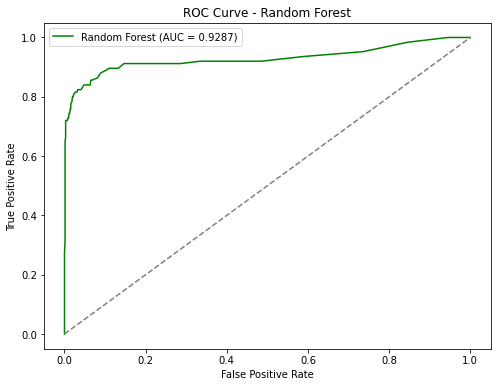

In [25]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})", color="green")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")

plt.legend()
plt.show()


**Interpretation:**
- **Precision**: Out of all predicted non-churners, 94% were correct and out of all predicted churners, 99% were correct. The model is very accurate when predicting churn cases.
- **Recall**: The model correctly identified 100% of the actual non-churners and 65% of actual churners. This shows that there are still churn customers that the model fails to identify.
- **F1 score**: High F1-score of 0.97 for non-churnrs indicates excellent overall performance for this class. However, f1 score of 0.78 for churners is a bit lower than for non-churn, reflecting the trade-off between precision and recall. The model is good at predicting churn, but there’s still room for improvement in detecting all churn customers.
- **Accuracy (0.95)**: The model correctly predicts whether a customer will churn or not in 95% of cases.
- **ROC-AUC score(0.9287)** Indicates excellent model performance. The model has a high capability to distinguish between churners and non-churners.
- **ROC curve**: It stays closer to the top-left corner, indicating excellent performance. The model achieves high true positive rates while keeping false positives low.

### Comparison between the logistic regression model and the random forest classifier

1. **Classification Report**
- **Logistic Regression**: Performs quite well in predicting non-churn customers, but it misses 28% of them (lower recall). While the recall is higher for churn customers (indicating that 73% of actual churn cases are detected), precision is quite low, meaning many of the predicted churn cases are false positives.
- **Random Forest**: Random forest detects all non-churn customers (perfect recall), showing strong performance on this class and has high precision for churn predictions, but it misses 35% of churn cases (lower recall), similar to logistic regression but with slightly better precision.
2. **Overall Accuracy**
- **Logistic Regression**: Accuracy is 0.72, which is lower than the random forest's performance. 
- **Random Forest**: Accuracy is 0.95, reflecting the model’s ability to predict non-churn cases with high recall. While it still misses churn customers, the model’s high precision for both classes boosts its overall performance.
3. **ROC-AUC Score**
- **Logistic Regression ROC-AUC = 0.8052**: The model is able to distinguish between churn and non-churn with reasonable accuracy. This is a good score, but there's room for improvement, especially in terms of improving recall for churn.
- **Random Forest ROC-AUC = 0.9287**: Random forest performs significantly better, with a higher AUC score, indicating that it is better at distinguishing between churn and non-churn cases.

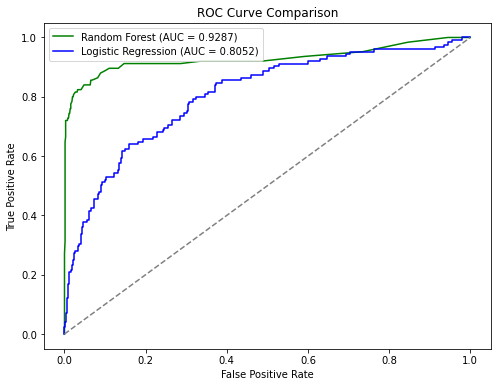

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})", color="green")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.4f})", color="blue")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")

plt.legend()
plt.show()

- The closer the ROC curve is to the top-left corner, the better the model's performance. The **Random Forest** curve is consistently above the Logistic Regression curve.
- **Random Forest** shows a better trade-off between True Positive Rate (Sensitivity/Recall) and False Positive Rate, making it the superior model for churn prediction.
- **Logistic Regression**, while performing decently, has a lower ability to correctly classify churn cases compared to Random Forest.


### Feature Importance Analysis
- In this section, we analyze the importance of each feature in predicting customer churn using the Random Forest classifier. Feature importance quantifies how much each feature contributes to the model's decision-making process. 

- The features with the highest importance scores are the most influential in determining churn. By identifying these key drivers, we can better understand what factors lead to customer churn and target those areas for improvement. These insights can guide strategies, such as enhancing customer service for high-risk users or optimizing plans based on customer usage patterns.

                   Feature  Importance
3        total day minutes    0.237867
11  customer service calls    0.151668
5        total eve minutes    0.097641
1       international plan    0.093496
7      total night minutes    0.072706
9       total intl minutes    0.066904
0           account length    0.055490
4          total day calls    0.052521
6          total eve calls    0.049279
8        total night calls    0.049230
10        total intl calls    0.043294
2          voice mail plan    0.029903


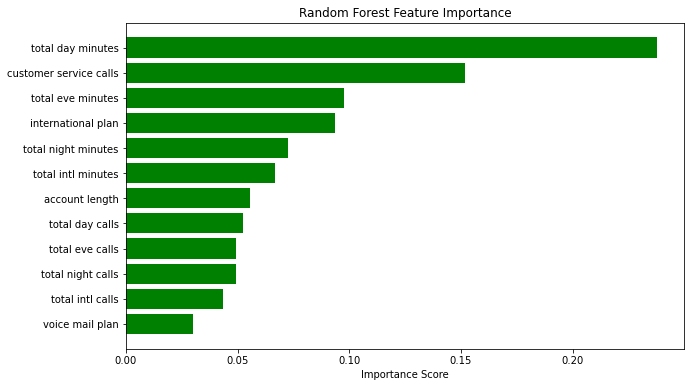

In [28]:
# Get feature importance scores from the trained Random Forest model
importances = rf.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance')

# Invert y-axis to show the most important feature at the top
plt.gca().invert_yaxis()  

plt.show()


- **Total day minutes** and **customer service calls** are the strongest indicators of churn. This suggests that high usage during the day and frequent customer service interactions signal potential dissatisfaction or issues.
- **International plan** also contributes significantly, indicating that customers with such plans might have higher churn rates, possibly due to cost or service issues.
- Features like voice mail plan and total international calls have minimal predictive power.

## Conclusion
- **Logistic Regression** performs adequately on non-churn cases but struggles with churn detection, as indicated by the low precision and recall for churn. Its performance is acceptable when computational resources are limited, or when simplicity is desired, but it is not ideal for imbalanced datasets.
- **Random Forest**, on the other hand, provides a more balanced performance across both classes, with better handling of class imbalance. It achieves high precision and recall for non-churn and performs significantly better than logistic regression for churn detection, though it still misses some churn cases. Its ROC-AUC score is much higher, indicating superior discrimination power.

## Recommendations
- For **better performance** on both classes, **Random Forest** is the better model, especially if your goal is to achieve a more robust performance for detecting churn while handling class imbalance. The higher ROC-AUC score and overall classification report indicate its suitability for this task.
- If **interpretability and computational efficiency** are key, Logistic Regression might be preferred, but additional techniques (like tuning the model further, or applying SMOTE) could help improve its performance. 

**NOTE**: However, for churn prediction in this case, Random Forest should be prioritized, especially when dealing with imbalanced data.
- As shown in feature importance analysis:
  1. Focus on Daytime Users: Monitor customers with high daytime usage and proactively offer support or incentives.
  2. Improve Customer Service: Address issues related to customer service interactions to reduce churn.
  3. International Plans: Evaluate and improve international plan offerings to reduce dissatisfaction.